<a href="https://colab.research.google.com/github/zvtech89/CAI-Class/blob/main/Transformation_%26_EDA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Exercise

##Step 1: Import Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Step 2: Reading Dataset & Analyzing the Data

https://www.kaggle.com/datasets/sukhmanibedi/cars4u

In [ ]:
data = pd.read_csv("/content/used_cars_data.csv")

###number of rows and columns?

In [ ]:
#data.?

###Visualizing some samples

In [ ]:
 #First samples
 #data.?

In [ ]:
#Last data samples
#data.?

In [ ]:
 #random Data Samples
 #Hint: sample
 #data.?

### data type and number of values in each column (feature)

**What variables are missing data?**

In [ ]:
#data.?

###Unique Values in each variable

**What Variables seem to be categorical?**

In [ ]:
data.nunique().sort_values()

,0
Transmission,2
Owner_Type,4
Fuel_Type,5
Seats,9
Location,11
Year,23
Engine,150
Power,386
Mileage,450
New_Price,625


As a starting point, variables with in between 10-20 are good Candidates for categorical features

Variables with many unique values can lead to issues like the "curse of dimensionality" where a model has too many features.

Tip:

| Function        | Purpose                                      | Output Type     | Example                                    |
|-----------------|----------------------------------------------|-----------------|--------------------------------------------|
| `.nunique()`    | Number of unique values                      | Integer         | `df['col1'].nunique()`  returns `3`        |
| `.unique()`     | Array of unique values                        | NumPy array     | `df['col1'].unique()` returns `['A' 'B' 'C']` |
| `.value_counts()` | Counts of each unique value                 | pandas Series  | `df['col1'].value_counts()`                |

###Missing Values Calculation

**What are valid conclusions about the features missing values?**

In [ ]:
 # Count
 missing_counts = data.isnull().sum()
 missing_counts

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
missing_percentages = (data.isnull().sum()/(len(data)))*100 #As percentages
missing_percentages

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [ ]:
pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
    # 'Missing_Percentage': missing_percentages.map('{:.2f}%'.format) #try this one for addtional formatting
}).sort_values('Missing_Count', ascending=False)

,Missing_Count,Missing_Percentage
New_Price,6247,86.129877
Price,1234,17.013650
Seats,53,0.730732
Engine,46,0.634220
Power,46,0.634220
Mileage,2,0.027575
Fuel_Type,0,0.000000
Kilometers_Driven,0,0.000000
Year,0,0.000000
Location,0,0.000000


##Step 3: Data Reduction

###Droping Columns

What column(s) should we drop?

In [ ]:
data.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [ ]:
data.shape

(7253, 14)

In [ ]:
# S.No. column appears to be just an index - should be dropped

data.drop(columns=['S.No.'],inplace=True)

# in-place= True (avoids assigning the output with = to the same variable)
# using columns=[] (avoids using axis=1)

In [ ]:
data.shape

(7253, 13)

In [ ]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


###Filtering Rows

What rows should we filter?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
data.shape

(7253, 13)

In [ ]:
data[data["Price"].notna()].shape

(6019, 13)

In [ ]:
# Filter data here


In [ ]:
#Reset the index may be needed
#data.reset_index(drop=True, inplace=True)


##Step 5: Creating Features (Feature engineering)

The main goal of Feature engineering is to create meaningful data from raw data.

* From year what other feature we can create that will probably be a better predictor of price?
* From name what information could we extract that makes more sense?




---



Examples of Feature Engineering Techniques:

* Scaling and Normalization: Transforming numerical features to a standard range (e.g., using Min-Max scaling or standardization).
* Encoding Categorical Variables: Converting categorical features (e.g., colors, countries) into numerical representations (e.g., one-hot encoding, label encoding).
* Creating Interaction Features: Combining two or more features to create a new feature that captures the interaction between them (e.g., creating a "BMI" feature from "weight" and "height").
* Polynomial Features: Creating polynomial versions of existing features (e.g., x, x^2, x^3).
* Binning: Grouping continuous values into discrete bins (e.g., age ranges).
* Feature Transformations: Applying mathematical functions to features (e.g., logarithms, square roots)or spliting categorical columns.
* Domain-Specific Feature Engineering: Creating features based on domain knowledge (e.g., creating features related to customer behavior in a marketing application

In [ ]:
from datetime import date



Add a new Column for Age

In [ ]:
#Use of datetime package functions
date.today().year

2025

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
### Creating Age feature from Year
date.today().year-data.Year #What else do we need?

,Year
0,15
1,10
2,14
3,13
4,12
...,...
7248,14
7249,10
7250,13
7251,12


In [ ]:
data.nunique()

,0
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150
Power,386


Extract model names

In [ ]:
data.Name.head(20)

,Name
0,Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V
3,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic
5,Hyundai EON LPG Era Plus Option
6,Nissan Micra Diesel XV
7,Toyota Innova Crysta 2.8 GX AT 8S
8,Volkswagen Vento Diesel Comfortline
9,Tata Indica Vista Quadrajet LS


In [ ]:
data.Name.str.split(n=1).str.get(0)
#create a new column

,Name
0,Maruti
1,Hyundai
2,Honda
3,Maruti
4,Audi
...,...
7248,Volkswagen
7249,Volkswagen
7250,Nissan
7251,Volkswagen


In [ ]:
#Check the remaining of the name
data.Name.str.split(n=1).str.get(1)

,Name
0,Wagon R LXI CNG
1,Creta 1.6 CRDi SX Option
2,Jazz V
3,Ertiga VDI
4,A4 New 2.0 TDI Multitronic
...,...
7248,Vento Diesel Trendline
7249,Polo GT TSI
7250,Micra Diesel XV
7251,Polo GT TSI


In [ ]:
#check the brand
data.Name.str.split().str.get(0).unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
data.Name.str.split().str.get(1).unique()

array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
       'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
       'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
       'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
       'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
       'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
       'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
       'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
       'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
       'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
       'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
       'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
       'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
       'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman'

In [ ]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta
2,Honda Jazz V,Honda,Jazz
3,Maruti Ertiga VDI,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento
7249,Volkswagen Polo GT TSI,Volkswagen,Polo
7250,Nissan Micra Diesel XV,Nissan,Micra
7251,Volkswagen Polo GT TSI,Volkswagen,Polo


...More cleaning

In [ ]:
#Replace Values in Brand
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover","OpelCorsa": "Opel"}, inplace=True)

/tmp/ipython-input-2730415942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover","OpelCorsa": "Opel"}, inplace=True)


Transform the colums
* Mileage, Engine, Power, New_Price


 And Covert to numbers those transformed columns that apply

In [ ]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz


In [ ]:
#Milage
#Check

In [ ]:
#Example: data['Engine'] = pd.to_numeric(data['Engine'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 850.1+ KB


In [ ]:
#Replace Values

In [ ]:
#Engine

In [ ]:
#Replace Values?
#covert to numbers?

In [ ]:
#Power

In [ ]:
#Replace Values?
#covert to numbers?

"lakh" refers to a unit of measurement used in the Indian numbering system, equivalent to 100,000

In [ ]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz


##Step 7: EDA (Exploratory Data Analysis) Starts Here

* EDA can be leveraged to check for outliers, patterns, and trends in the given data.
* EDA helps to find meaningful patterns in data.
* EDA provides in-depth insights into the data sets to solve our business problems.
* EDA gives a clue to impute missing values in the dataset.

## Step 8: Statistics Summary

Findings?

* Kilometers_Driven
* Range of Years and average?
* Mileage
* Engine
* Seats

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 850.1+ KB


Summary Statistics (Transposed?... looks better)



In [ ]:
#Summary for numeric Values
#Hint use include = 'number'


,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [ ]:
#Summary for Categorical Values
#Hint use include = 'object'

##Step 9: EDA Univariate Analysis

Let's separate the columns names by Categorical and numeric

In [ ]:
data.info()

In [ ]:
#Get Names of Categorical Columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price',
 'Brand',
 'Model']

In [ ]:
#Get Names of numeric Columns
num_cols =
num_cols

['Year', 'Kilometers_Driven', 'Seats', 'Price']

#### **Question:** What are your Findings and Observations for numerical variables?

* Outliers ?
* Data Types ?

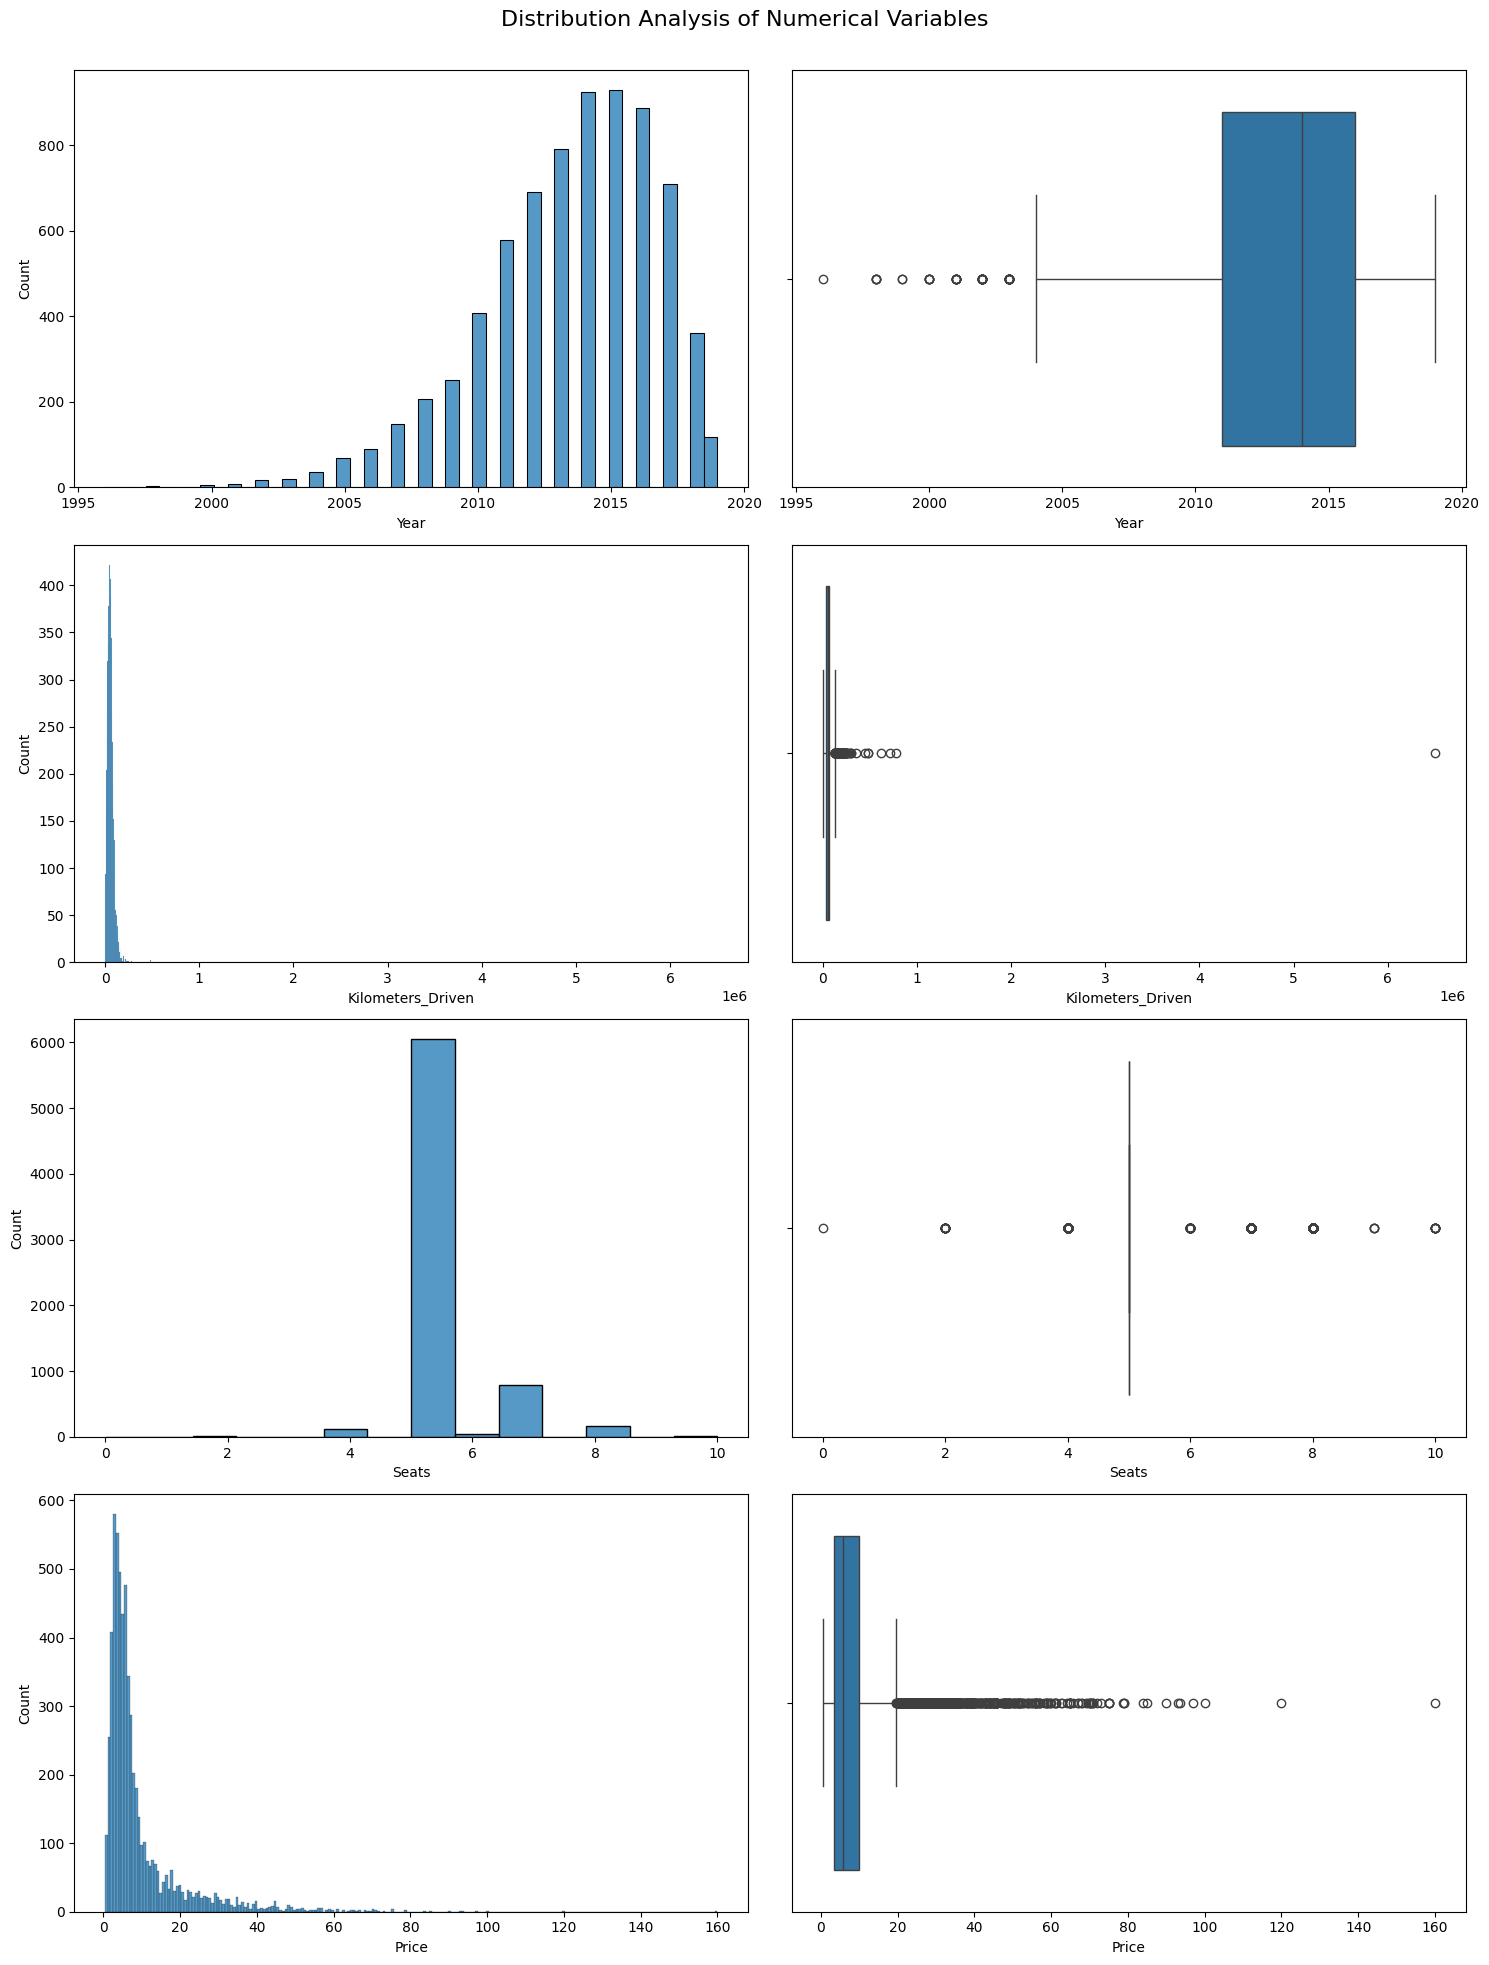

In [ ]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 5*len(num_cols)))
fig.suptitle('Distribution Analysis of Numerical Variables', fontsize=16)

for i, col in enumerate(num_cols):
  sns.histplot(data=data, x=col, ax=axes[i, 0])
  sns.boxplot(x=data[col], ax=axes[i, 1])

plt.tight_layout()
fig.subplots_adjust(top=0.95) # Adjust the top spacing to make room for the suptitle
plt.show()

##### **Question:** What are your findings and Observations for categorical?

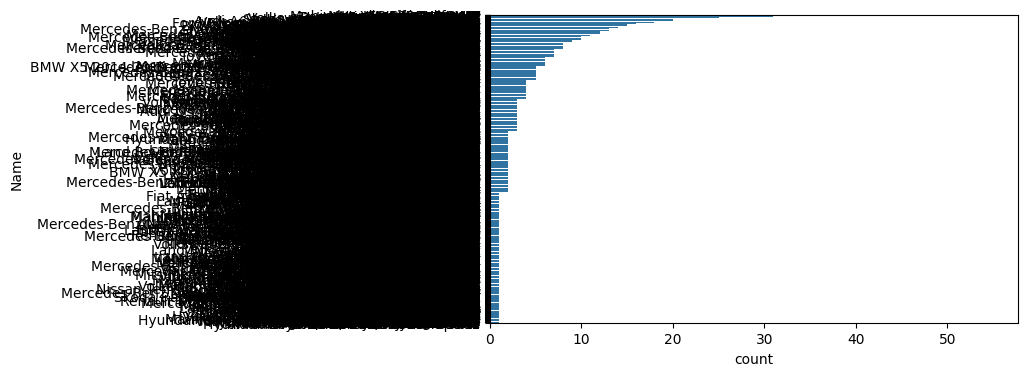

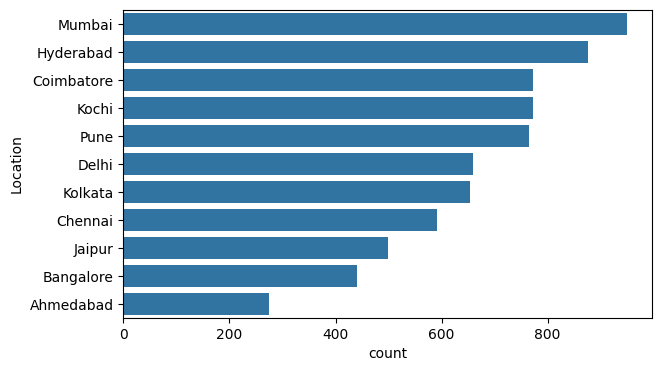

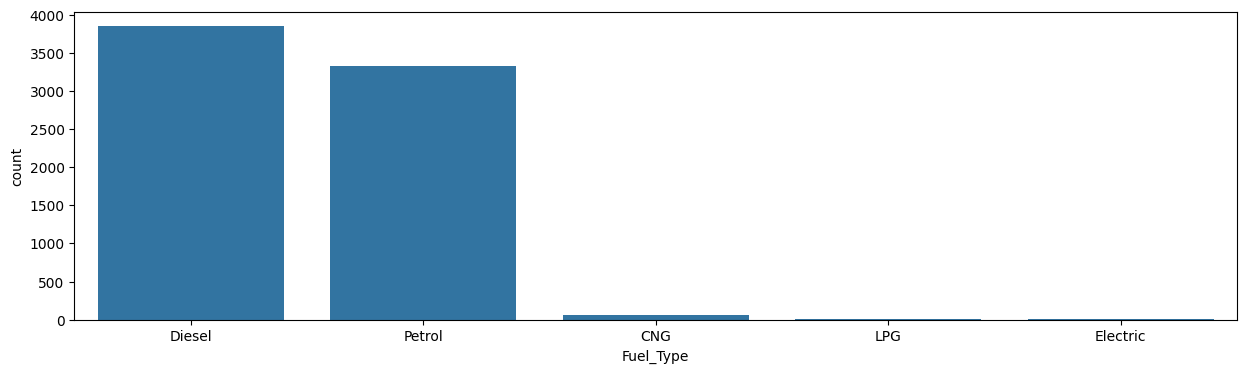

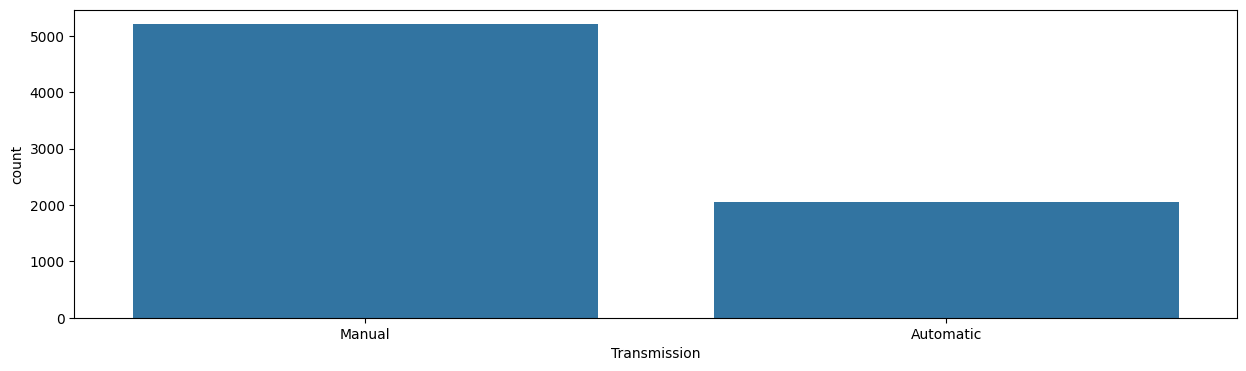

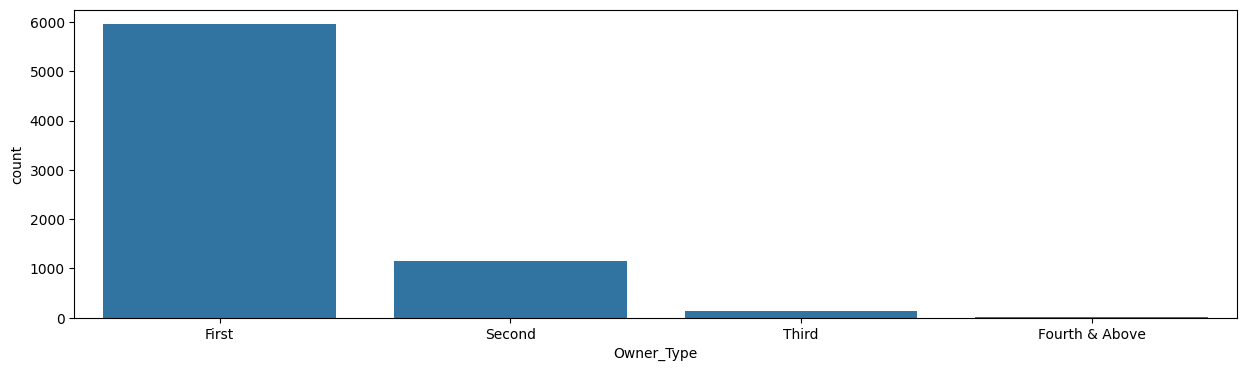

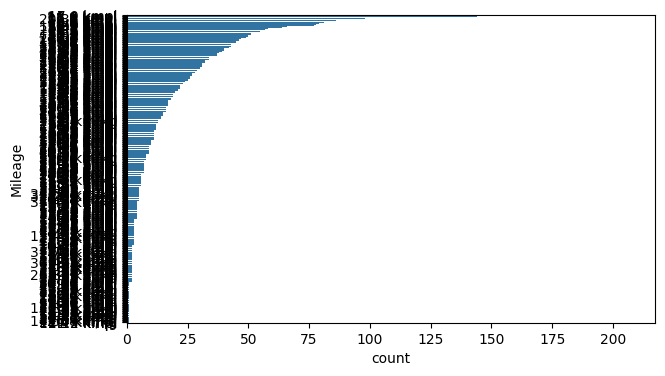

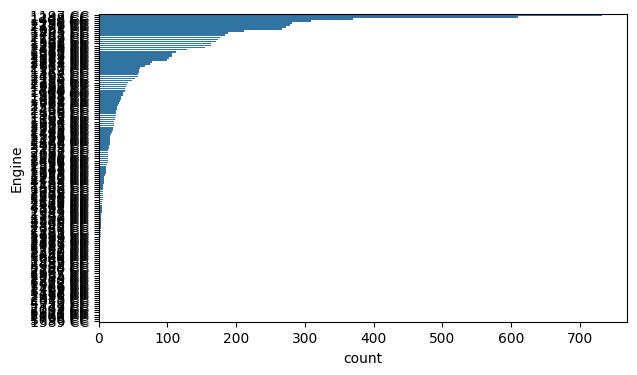

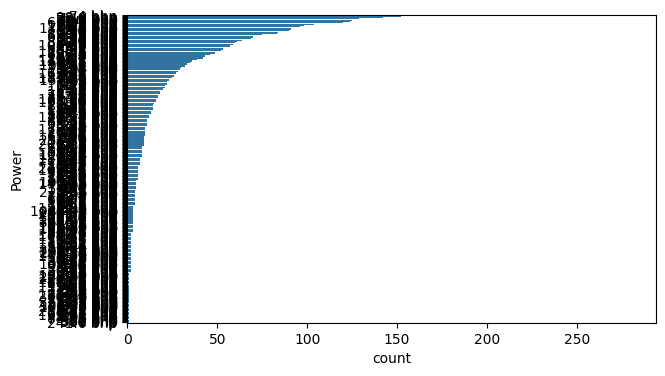

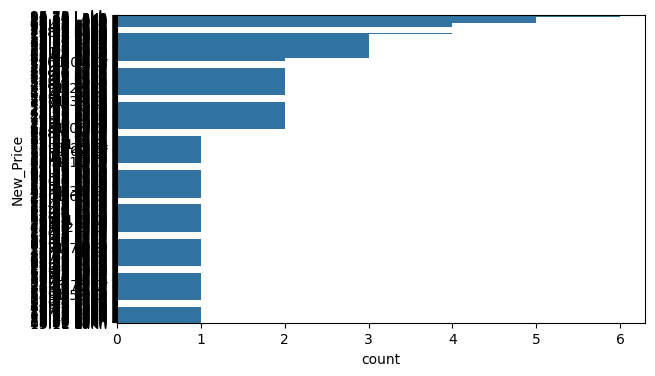

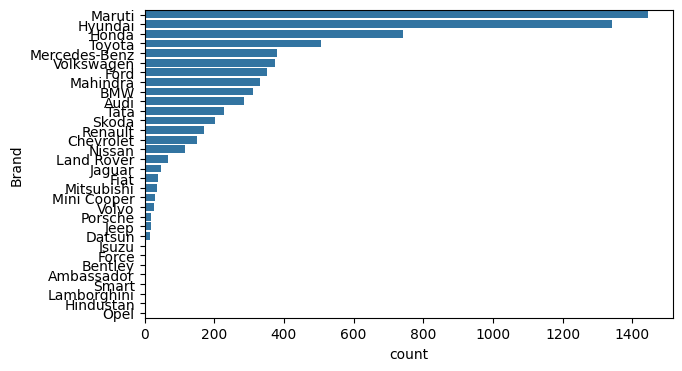

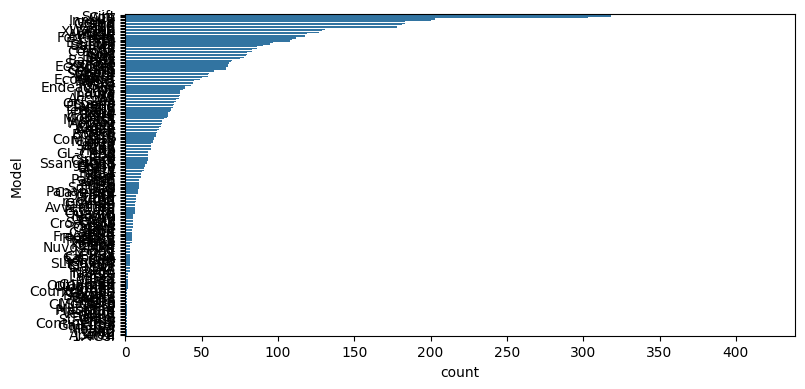

In [ ]:
#Categorical Columns
#Create Bar Plot
for col in cat_cols:
  plt.figure(figsize = (15, 4))
  # Value counts
  value_counts = data[col].value_counts()
  if len(value_counts) > 10:  # Use horizontal bar for many categories
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, y=col, order=value_counts.index)
  else:
    sns.countplot(data=data, x=col, order=value_counts.index)
    # plt.title(f'{col} - Distribution')
    # plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question:** What are some Insights??
* Brand with the highest number of cars available for purchase, followed by ?
* % of cars have fuel type as Diesel ?
* manual transmission?
* First owned cars?
* brand ?
* models?

##Step 10: EDA Multivariate Analysis

<Figure size 500x1000 with 0 Axes>

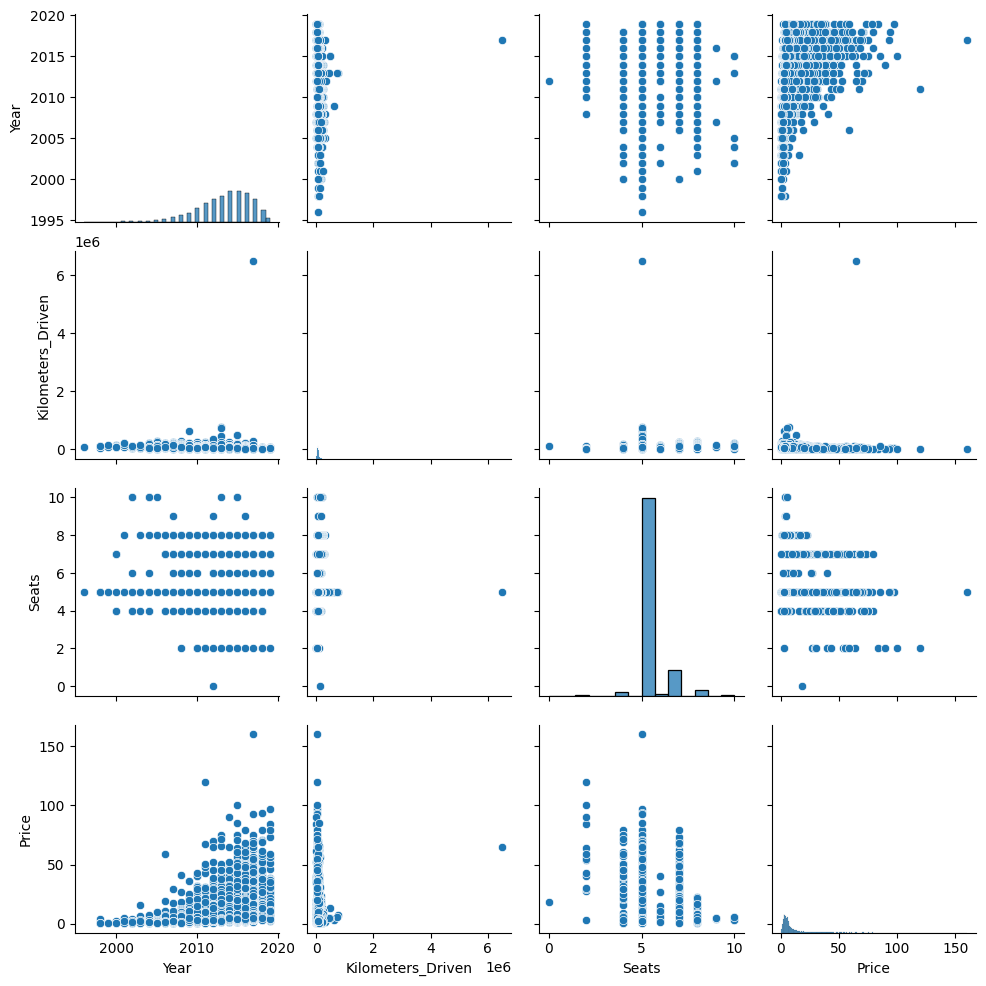

In [ ]:
# Seaborne Pair Plot
plt.figure(figsize=(5,10))
sns.pairplot(data=data)

**Question:** What insights can you get from the pair plot:

* Year?
* Mileage?
* As power increases?
* Car with recent make?
* Age of the car?
* Engine?

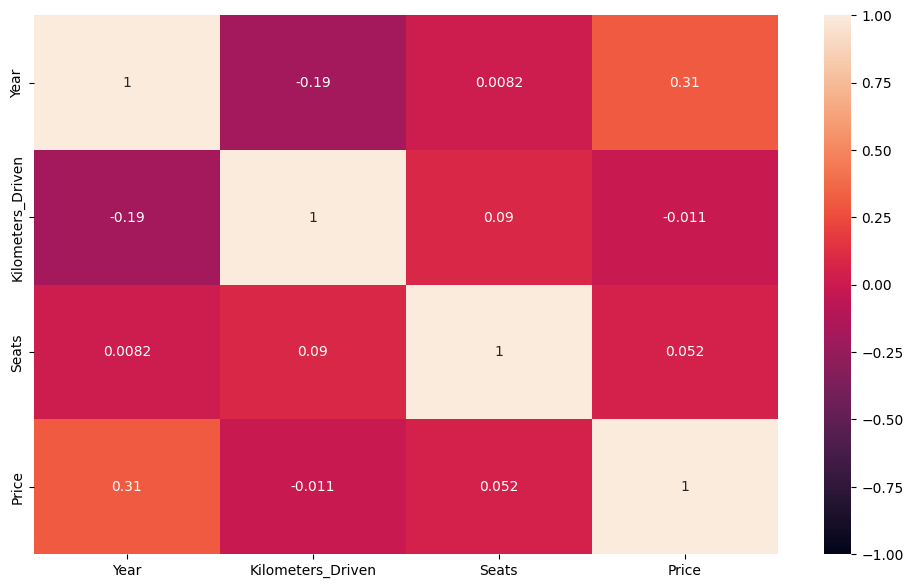

In [ ]:
#Let's plot the correlation of Data using a heat Map
plt.figure(figsize=(12, 7))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Question:**: Correlation Analysis Insights

* The engine has a strong positive correlation to?
* Price has a positive correlation to?
* Mileage has correlation to?
* Price and year?
* Kilometer driven to year? to price?
* Car age and Price? car Age is positively correlated to?
* kilometers with Mileage?

#**Question:** Add your conclusions about the data analysis for this dataset

Here